## FINAL PROJECT SUBMISSION

Please fill out:
* Student name: MERCY KIRAGU
* Student pace: FULLTIME-HYBRID
* Scheduled project review date/time:22/03/2024
* Instructor name: MARYANN MWIKALI
* Blog post URL:N/A


# MICROSOFT MOVIE'S STUDIOS

### INTRODUCTION

### PROJECT OVERVIEW

The main goal of the project is to come up with insights to help Microsoft start and excel in the movie business.We will use exploratory data analysis to come up with actionable insights to help decide what type of films Microsoft should create.

## BUSINESS UNDERSTANDING

### BUSINESS PROBLEM


Microsoft intends to create a new movie studio as part of its movie business endeavors.
Microsoft's inexperience in the film industry is the key problem.

The particular issue lies in knowing what kinds of movies are currently doing well at the box office so that they may make informed decisions while producing their own material.
Interested parties:

The head of Microsoft's new movie studio, who will be in charge of making strategic choices about the company's output, is the main stakeholder.
Additional stakeholders may be investors interested in knowing if Microsoft's movie industry entry is feasible, as well as Microsoft personnel in charge of this endeavor.

### OBJECTIVE

The objective of this project is to provide actionable insights to the head of Microsoft's new movie studio, helping them decide what type of films to create. This will be achieved through:

Exploratory Data Analysis (EDA): Analyzing the movie datasets

Identifying Trends: Uncovering patterns and trends within the data to determine which film genres are currently doing the best at the box office.

Investigate the relationship between budget and revenue to determine the impact of investment on film success.

Translating Findings into Recommendations: Transforming the insights from the data analysis into practical suggestions for the studio head regarding target genres for their film productions.

These actionable insights will be based on data-driven evidence, aiming to increase the chances of success for Microsoft's new movie studio ventures.

### KEY DELIVERABLES

1.What's the distribution of the box office earnings?

2.Which movies are top-performing based on earnings?

3.What's the popularity of different genres?

4.Which genres tend to have higher box office earnings.

5.What is the impact of movie ratings on box office success.

6.Are there any  trends regarding release dates (seasonality, month/day of the week).

## DATA UNDERSTANDING

#### DATA SOURCES


zippedData folder: Contains movie datasets from various sources like Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers.

Formats: Vary across sources, with some being CSV/TSV files readable by spreadsheet software or pd.read_csv in Python.

IMDB data: Stored within a separate SQLite database (im.db.zip), containing relevant tables like movie_basics and movie_ratings.


IMPORTING THE NECESSARY LIBRARIES

In [1]:
#importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import gzip
import zipfile
%matplotlib inline

In [2]:
#decompressing the files
with gzip.open('zippedData/bom.movie_gross.csv.gz','rb') as f_in, open('bom.movie_gross.csv', 'wb') as f_out:
  # Read the compressed data
  bom_movie = f_in.read()
  # Write the decompressed data to a new CSV file
  f_out.write(bom_movie)
with gzip.open('zippedData/tn.movie_budgets.csv.gz','rb')as f_in, open('tn.movie_budgets.csv','wb') as f_out:
  tn_movie = f_in.read()
  f_out.write(tn_movie)
with gzip.open('zippedData/rt.movie_info.tsv.gz','rb') as f_in, open('rt.movie_info.tsv','wb') as f_out:
  rt_movie = f_in.read()
  f_out.write(rt_movie)
with gzip.open('zippedData/tmdb.movies.csv.gz','rb') as f_in,open('tmdb.movies.csv','wb') as f_out:
  tmdb_movies = f_in.read()
  f_out.write(tmdb_movies)
with gzip.open('zippedData/rt.reviews.tsv.gz','rb') as f_in,open('rt.reviews.tsv','wb') as f_out:
  rt_reviews = f_in.read()
  f_out.write(rt_reviews)





## LOADING DATASETS

In [3]:
#loading datasets
bom_movies = pd.read_csv('bom.movie_gross.csv')
rt_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
movie_budgets = pd.read_csv('tn.movie_budgets.csv')



In [4]:
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [5]:
#connecting to the imdb database
conn = sqlite3.connect("zippedData/im.db")

In [6]:
#creating a cursor in order to execute queries
cur = conn.cursor()

# This is a query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [7]:
# Use the fetchall method to find out the table names
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]


### UNDERSTANDING THE BOM.MOVIE_GROSS DATASET

In [8]:
#Read the CSV file into a DataFrame
bom_movies = pd.read_csv('bom.movie_gross.csv')
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
#checking the number of rows and columns
bom_movies.shape

(3387, 5)

The bom_movies dataset has 3387 rows and 5 columns.

In [10]:
#checking the column names
bom_movies.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

The columns are title,studio,domestic_gross,foreign_gross and year.

In [11]:
#checking dataframe's structure and information
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
#checking if the columns have missing values
bom_movies.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [13]:
#checking for the number of rows with missing values in each column
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
#check if there are duplicated values in the columns
bom_movies.duplicated().any()

False

In [15]:
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movies[columns_w_na].isnull().mean() * 100

for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column,percentage_missing[column])) 

Percentage of missing values in column 'studio': 0.15%
Percentage of missing values in column 'domestic_gross': 0.83%
Percentage of missing values in column 'foreign_gross': 39.86%


### UNDERSTANDING THE RT_REVIEWS DATASET

In [16]:
#read the CSV file into a dataframe
rt_reviews = pd.read_csv('rt.reviews.tsv', sep='\t', encoding= 'latin1')
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [17]:
#checking the number of rows and columns
rt_reviews.shape

(54432, 8)

In [18]:
#checking the column names
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [19]:
#checking the structure and information of the data
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [20]:
#check if there are any missing values
rt_reviews.isna().any()


id            False
review         True
rating         True
fresh         False
critic         True
top_critic    False
publisher      True
date          False
dtype: bool

In [21]:
#check the number of missing values in each column
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [22]:
#check if there are any duplicated values
rt_reviews.duplicated().any()

True

In [23]:
#check the number of duplicated values
rt_reviews.duplicated().sum()

9

### UNDERSTANDING THE RT_MOVIES DATASET

In [24]:
#reading the CSV file into a DATA FRAME
rt_movies = pd.read_csv('rt.movie_info.tsv', sep='\t')
rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [25]:
rt_movies.shape

(1560, 12)

In [26]:
rt_movies.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [27]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [28]:
rt_movies.isna().any()

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool

In [29]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [30]:
rt_movies.duplicated().any()

False

### UNDERSTANDING THE MOVIE_BUDGETS DATASET

In [31]:
#reading the CSV file as a DATAFRAME
movie_budgets = pd.read_csv('tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [32]:
movie_budgets.shape

(5782, 6)

In [33]:
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [34]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [35]:
movie_budgets.duplicated().any()

False

In [36]:
movie_budgets.isnull().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

In [37]:
movie_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

### UNDERSTANDING THE TMDB_MOVIES DATASET

In [38]:
#reading the CSV file as a dataframe
tmdb_movies = pd.read_csv('tmdb.movies.csv')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [39]:
tmdb_movies.shape

(26517, 10)

In [40]:
tmdb_movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [41]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [42]:
tmdb_movies.duplicated().any()

False

In [43]:
tmdb_movies.isnull().any()

Unnamed: 0           False
genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [44]:
tmdb_movies.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

### UNDERSTANDING MOVIE_RATINGS AND MOVIE_BASICS

In [45]:
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [46]:
pd.read_sql("SELECT * FROM movie_ratings;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [47]:
query = '''SELECT mr.*, mb.*
FROM movie_ratings mr
INNER JOIN movie_basics mb USING(movie_id);'''
pd.read_sql(query,conn)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,tt10384606,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,tt1042974,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...,...,...
73851,tt9805820,8.1,25,tt9805820,Caisa,Caisa,2018,84.0,Documentary
73852,tt9844256,7.5,24,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
73853,tt9851050,4.7,14,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama"
73854,tt9886934,7.0,5,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary


## DATA CLEANING

#### CLEANING THE BOM.MOVIE_GROSS DATASET

In [48]:
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [49]:
#replace missing values domestic gross with mean and drop missing values in studio.
mean_domestic_gross = bom_movies['domestic_gross'].mean()
bom_movies['domestic_gross'].fillna(mean_domestic_gross, inplace=True)

bom_movies.dropna(subset=['studio'], inplace=True)

In [50]:
# Replace NaN values with 0 in the 'foreign_gross' column for easier cleaning
bom_movies['foreign_gross'].fillna(0, inplace=True)


# Convert 'foreign_gross' column to numeric (float) data type
bom_movies['foreign_gross'] = pd.to_numeric(bom_movies['foreign_gross'], errors='coerce')

print(bom_movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3377 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB
None


In [51]:
#checking if the datatype of foreign gross has changed from object 
bom_movies["foreign_gross"].dtype

dtype('float64')

In [52]:
bom_movies.duplicated().any()

False

#### CLEANING THE RT_MOVIES DATASET

In [53]:
#checking the missing values
rt_movies.isnull().any()

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool

In [54]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [55]:
rt_movies.dropna(subset=['synopsis', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime', 'studio',  'currency', 'rating', 
'genre', 'box_office'], inplace=True)

In [56]:
#dropping rows with missing values
rt_movies = rt_movies.dropna()

In [57]:
#checking the shape
rt_movies.shape

(235, 12)

In [58]:
rt_movies.duplicated().any()

False

In [59]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


#### CLEANING THE RT_REVIEWS DATASET

In [60]:
rt_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [61]:
rt_reviews= rt_reviews.dropna()

In [62]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In [63]:
duplicates = rt_reviews[rt_reviews.duplicated()]
len(duplicates)

0

#### CLEANING THE TMDB_MOVIES DATASET

In [64]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [65]:
tmdb_movies.duplicated().any()

False

####  CLEANING THE MOVIE_BUDGETS DATASET

In [66]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [67]:
movie_budgets.duplicated().any()

False

## DATA ANALYSIS

### EXPLORATORY DATA ANALYSIS

#### 1.WHAT'S THE DISTRIBUTION OF BOX OFFICE EARNINGS?

In [68]:
bom_movies.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


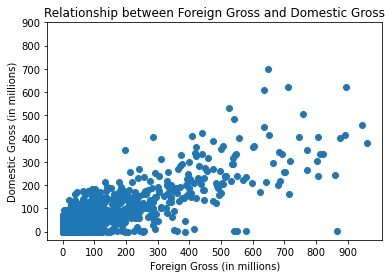

In [69]:
# Create a scatter plot
plt.scatter(bom_movies['foreign_gross'],bom_movies['domestic_gross'], color='tab:blue')
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Relationship between Foreign Gross and Domestic Gross')

# Set the tick values
x_ticks = range(0, int(max(bom_movies['foreign_gross'])/1000000) + 1, 100)
y_ticks = range(0, int(max(bom_movies['domestic_gross'])/1000000) + 1, 100)

#Convert tick values to millions
x_ticks_millions = [x * 1000000 for x in x_ticks]
y_ticks_millions = [y * 1000000 for y in y_ticks]

#Set the modified tick values
plt.xticks(x_ticks_millions, x_ticks)
plt.yticks(y_ticks_millions, y_ticks)

plt.show()

There is a positive correlation between domestic gross and foreign gross. This means that movies that do well domestically also tend to do well internationally.

In [70]:
# Create a new column "total_gross"
bom_movies['total_gross'] = (bom_movies['domestic_gross'].fillna(0) + bom_movies['foreign_gross'].fillna(0))
bom_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,0.0,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,0.0,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,0.0,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,0.0,2018,2.400000e+03


In [71]:
# Count the number of unique studios
unique_studios = bom_movies['studio'].nunique()

print("Number of unique studios:", unique_studios)

Number of unique studios: 257


There are 257 unique studios

In [72]:
# Find the index of the row with the highest total gross
highest_total_gross_index = bom_movies['total_gross'].idxmax()

movie_highest_total_gross = bom_movies.loc[highest_total_gross_index, 'title']

print("Movie with the highest total gross:", movie_highest_total_gross)

Movie with the highest total gross: Marvel's The Avengers


Marvel's The Avengers is the movie with the highest total gross.

In [73]:
top_ten_movies = bom_movies.nlargest(10, 'total_gross')

# Display the list of top ten movies
print("Top ten movies by total gross:")
print(top_ten_movies[['title', 'total_gross']])

Top ten movies by total gross:
                                            title   total_gross
727                         Marvel's The Avengers  1.518900e+09
1875                      Avengers: Age of Ultron  1.405400e+09
3080                                Black Panther  1.347000e+09
328   Harry Potter and the Deathly Hallows Part 2  1.341500e+09
2758                     Star Wars: The Last Jedi  1.332600e+09
3081               Jurassic World: Fallen Kingdom  1.309500e+09
1127                                       Frozen  1.276400e+09
2759                  Beauty and the Beast (2017)  1.263500e+09
3082                                Incredibles 2  1.242800e+09
1128                                   Iron Man 3  1.214800e+09


#### ANALYZING THE RATINGS FROM TMDB_MOVIES DATASET

WHAT ARE THE MOVIES WITH THE HIGHEST POPULARITY?

In [74]:
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Minimum Rating: 0.0
Maximum Rating: 10.0
The mean value of the ratings column is 5.991, median value is 6.0.    
The standard deviation is 1.853.


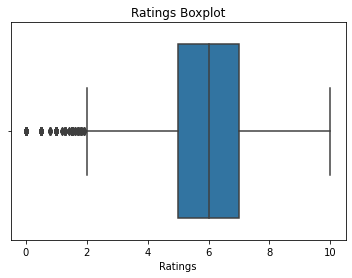

In [75]:
ratings_tmdb = tmdb_movies['vote_average']

# Calculate the minimum and maximum values
min_rating = ratings_tmdb.min()
max_rating = ratings_tmdb.max()

# Print the range of values
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)


print(f'The mean value of the ratings column is {ratings_tmdb.mean():.3f}, median value is {ratings_tmdb.median()}.\
    \nThe standard deviation is {ratings_tmdb.std():.3f}.')

column_data = tmdb_movies['vote_average']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data, color='tab:blue')

plt.title('Ratings Boxplot')
plt.xlabel('Ratings')

plt.show();

In [76]:
# Calculate the correlation between 'vote_average' and 'popularity'
correlation = tmdb_movies['vote_average'].corr(tmdb_movies['popularity'])

print(f"Correlation between vote average and popularity: {correlation}")

# Get the first 10 movies with the highest popularity
top_10_popularity = tmdb_movies.nlargest(10, 'popularity')

# Displaying the top 10 movies with highest popularity
print("\nTop 10 movies with highest popularity:")
print(top_10_popularity[['original_title', 'popularity']])

Correlation between vote average and popularity: 0.06527330770988107

Top 10 movies with highest popularity:
                                    original_title  popularity
23811                       Avengers: Infinity War      80.773
11019                                    John Wick      78.123
23812            Spider-Man: Into the Spider-Verse      60.534
11020    The Hobbit: The Battle of the Five Armies      53.783
5179                                  The Avengers      50.289
11021                      Guardians of the Galaxy      49.606
20617                            Blade Runner 2049      48.571
23813                            Blade Runner 2049      48.571
23814  Fantastic Beasts: The Crimes of Grindelwald      48.508
23815                    Ralph Breaks the Internet      48.057


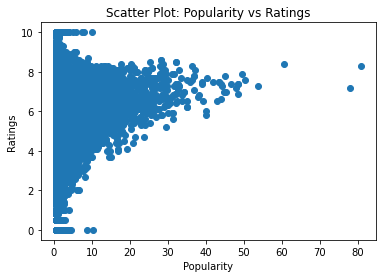

In [77]:
popularity_data = tmdb_movies['popularity']
ratings_data = tmdb_movies['vote_average']

# Create the scatter plot
plt.scatter(popularity_data, ratings_data, color='tab:blue')

plt.title('Scatter Plot: Popularity vs Ratings')
plt.xlabel('Popularity')
plt.ylabel('Ratings')


plt.show()

 In this scatter plot, there is a weak positive correlation between popularity and ratings. This means that movies that have received more ratings tend to have slightly higher average ratings. However, there is a lot of variation, and there are many movies with high ratings that haven't been rated by many people.

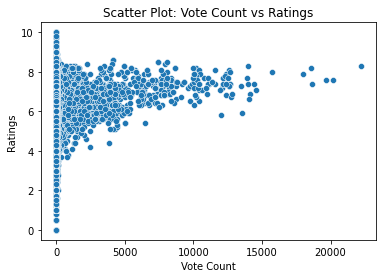

In [78]:
# compare vote_count and rating

vote_count_data = tmdb_movies['vote_count']
ratings_data = tmdb_movies['vote_average']

# Create the scatter plot using Seaborn
sns.scatterplot(x=vote_count_data, y=ratings_data, color='tab:blue')

# Set the title and labels
plt.title('Scatter Plot: Vote Count vs Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Ratings')

# Display the plot
plt.show()

There appears to be a weak positive correlation between vote count and ratings. This means that movies that have received more votes (more popular) tend to have slightly higher average ratings.

#### ANALYZING THE MOVIE_BUDGETS DATASET

2.WHICH MOVIES HAVE THE HIGHEST RETURN PROFIT COUNTRYWIDE AND WORLDWIDE?

In [79]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [80]:
# Convert 'release_date' column to datetime format
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [81]:
movie_budgets['production_budget'].tail()

5777    $7,000
5778    $6,000
5779    $5,000
5780    $1,400
5781    $1,100
Name: production_budget, dtype: object

In [82]:
# Remove non-numeric characters and convert to numeric data type
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(r'[^0-9]', '', regex=True).astype(float)

movie_budgets['production_budget'].head()

0    425000000.0
1    410600000.0
2    350000000.0
3    330600000.0
4    317000000.0
Name: production_budget, dtype: float64

In [83]:
# Convert currency columns to numeric values (remove '$' and commas, and convert to float)
currency_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for col in currency_columns:
    movie_budgets[col] = movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)

# Calculate profit/loss differences between production budgets and domestic gross
movie_budgets['domestic_profit_loss'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']

# Calculate profit/loss differences between production budgets and worldwide gross
movie_budgets['worldwide_profit_loss'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

# Find movies with the highest return profit (domestic)
highest_domestic_profit = movie_budgets.loc[movie_budgets['domestic_profit_loss'].idxmax()]

# Find movies with the highest return profit (worldwide)
highest_worldwide_profit = movie_budgets.loc[movie_budgets['worldwide_profit_loss'].idxmax()]

# Display movies with the highest return profit (domestic and worldwide)
print("Movie with the highest return profit (Domestic):")
print(highest_domestic_profit[['movie', 'domestic_profit_loss']])

print("\nMovie with the highest return profit (Worldwide):")
print(highest_worldwide_profit[['movie', 'worldwide_profit_loss']])

Movie with the highest return profit (Domestic):
movie                   Star Wars Ep. VII: The Force Awakens
domestic_profit_loss                             6.30662e+08
Name: 5, dtype: object

Movie with the highest return profit (Worldwide):
movie                         Avatar
worldwide_profit_loss    2.35135e+09
Name: 0, dtype: object


In [84]:
# Sort by domestic profit/loss and get the top 10 movies
top_ten_domestic_profit = movie_budgets.nlargest(10, 'domestic_profit_loss')[['movie', 'domestic_profit_loss']]

# Sort by worldwide profit/loss and get the top 10 movies
top_ten_worldwide_profit = movie_budgets.nlargest(10, 'worldwide_profit_loss')[['movie', 'worldwide_profit_loss']]

# Display top ten movies with the highest return profit (domestic)
print("Top ten movies with the highest return profit (Domestic):")
print(top_ten_domestic_profit)

print("\nTop ten movies with the highest return profit (Worldwide):")
print(top_ten_worldwide_profit)

Top ten movies with the highest return profit (Domestic):
                                     movie  domestic_profit_loss
5     Star Wars Ep. VII: The Force Awakens           630662225.0
41                           Black Panther           500059566.0
42                                 Titanic           459363944.0
3464          Star Wars Ep. IV: A New Hope           449998007.0
33                          Jurassic World           437270625.0
3525             ET: The Extra-Terrestrial           424610554.0
43                           Incredibles 2           408581744.0
26                            The Avengers           398279547.0
6                   Avengers: Infinity War           378815482.0
692                                Shrek 2           371226247.0

Top ten movies with the highest return profit (Worldwide):
                                             movie  worldwide_profit_loss
0                                           Avatar           2.351345e+09
42                 

In [85]:
#Identifying top-performing movies
top_grossing_movies = movie_budgets.sort_values('worldwide_gross', ascending=False).head(10)
top_grossing_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit_loss,worldwide_profit_loss
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,459363944.0,2.008208e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,630662225.0,1.747311e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,437270625.0,1.433855e+09
66,67,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,163007020.0,1.328723e+09
26,27,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,398279547.0,1.292936e+09
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
41,42,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09,500059566.0,1.148258e+09
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,256193157.0,1.216693e+09


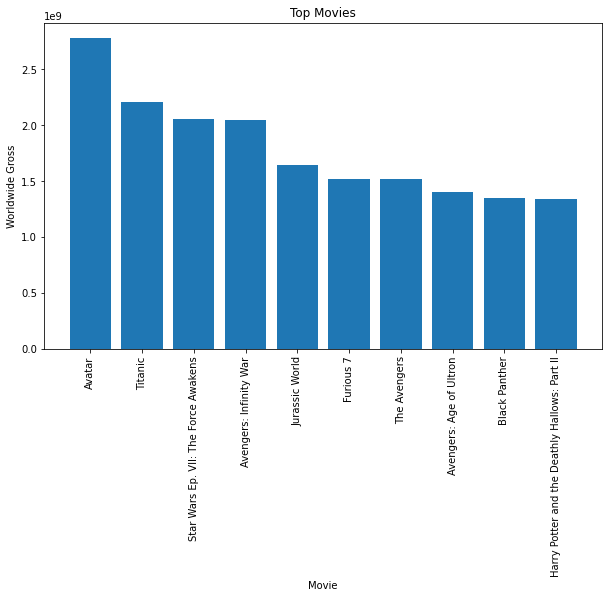

In [86]:
# Barchart showing the Top showing Movies
plt.figure(figsize=(10, 6))
plt.bar(top_grossing_movies['movie'], top_grossing_movies['worldwide_gross'])
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross')
plt.title('Top Movies')
plt.xticks(rotation=90)
plt.show()

The above histogram shows the top 10 movies with the highest worldwide gross.

4.ARE THERE ANY TRENDS REGARDING RELEASE DATES?

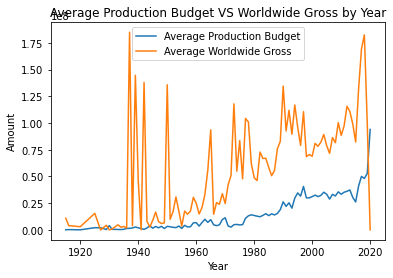

In [87]:
#Exploring trends over time
movie_budgets['Release Year'] = pd.to_datetime(movie_budgets['release_date']).dt.year

average_budget_by_year = movie_budgets.groupby('Release Year')['production_budget'].mean()
average_gross_by_year = movie_budgets.groupby('Release Year')['worldwide_gross'].mean()

plt.plot(average_budget_by_year.index, average_budget_by_year.values, label='Average Production Budget')
plt.plot(average_gross_by_year.index, average_gross_by_year.values, label='Average Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Average Production Budget VS Worldwide Gross by Year')
plt.legend()
plt.show()

It shows that movie production budgets have continued to increase with the increasing worldwide gross from 1920 to 2020,meaning that investing in production ,yields high profit return.


#### ANALYZING THE RT_MOVIES DATASET

5.WHICH GENRES TEND TO  HAVE HIGH BOX OFFICE EARNINGS?

In [88]:
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [89]:
# Converting box_office column to numeric values (removing $ sign)
rt_movies['box_office'] = rt_movies['box_office'].replace('[\$,]', '', regex=True).astype(float)

# Grouping by genre and calculating mean box office revenue for each genre
genre_mean_box_office = rt_movies.groupby('genre')['box_office'].mean().sort_values(ascending=False)

top_5_genres = genre_mean_box_office.head(5)
print(top_5_genres)

genre
Kids and Family|Science Fiction and Fantasy                              2.618359e+08
Science Fiction and Fantasy                                              1.908711e+08
Action and Adventure|Drama|Mystery and Suspense                          1.467904e+08
Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy    1.447380e+08
Action and Adventure|Science Fiction and Fantasy                         1.420119e+08
Name: box_office, dtype: float64


### ANALYZING THE IMDB DATASET

6.IS THERE A CONNECTION BETWEEN A MOVIE'S SUCCESS AND HOW POPULAR ITS RELEASE REGION IS?

In [90]:
#reading the movies_akas table from the database
movie_akas = pd.read_sql(''' SELECT * FROM MOVIE_AKAS;''',conn)

In [91]:
movie_akas['region'].value_counts().head()

US     51490
XWW    18467
RU     13817
DE     11634
FR     10990
Name: region, dtype: int64

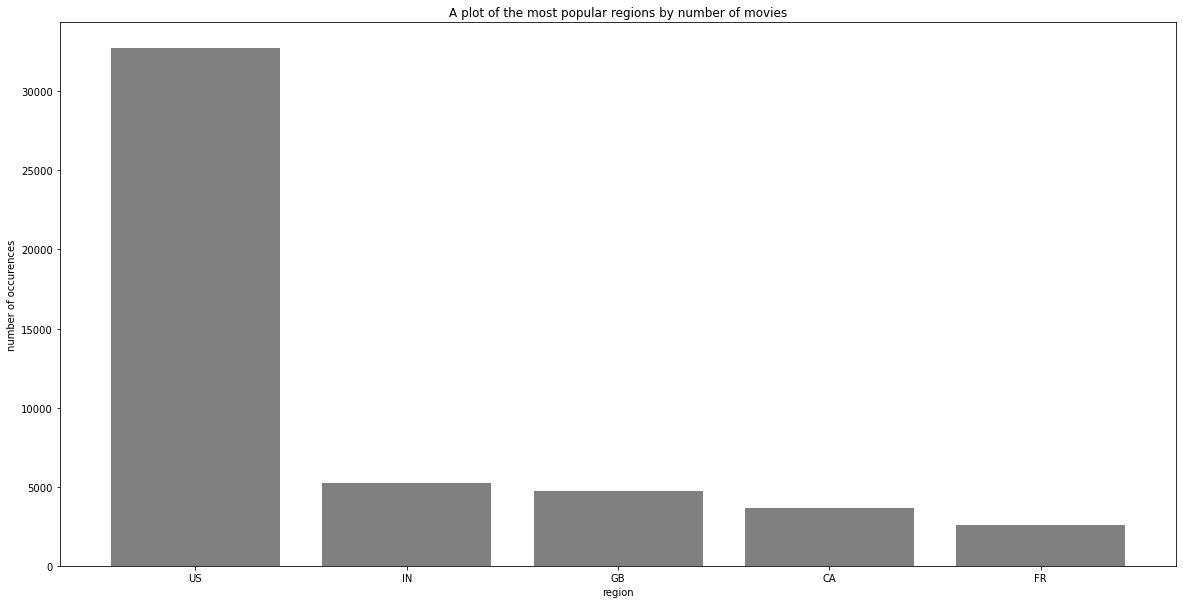

In [92]:
region = ['US', 'IN', 'GB', 'CA', 'FR']
entries = [32728, 5246, 4728, 3683, 2559]

popular_regions = plt.figure(figsize = (20, 10))

 
# creating the bar plot
plt.bar(region, entries, color ='grey')

plt.xlabel('region')
plt.ylabel('number of occurences')
plt.title('A plot of the most popular regions by number of movies')
plt.show()

In [93]:
merged_tables = df = pd.read_sql (""" SELECT *
                            FROM movie_basics
                            JOIN movie_ratings
                                USING (movie_id)
                    """, conn
)
merged_tables

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [94]:
#Creating a common column in the df dataset
df["title"] = df["original_title"]
df.drop("original_title", axis=1, inplace=True)
df

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Ashad Ka Ek Din
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,Sabse Bada Sukh
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,La Telenovela Errante
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,Diabolik sono io
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Sokagin Çocuklari
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8,Albatross
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,None,6.6,5,La vida sense la Sara Amat


In [95]:
merge = pd.merge(df, bom_movies, on = 'title')
merge

,movie_id,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,total_gross
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,0.0,2016,1100000.0
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000.0,2012,8744000.0
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000.0,2013,188100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2439,tt8097306,Nobody's Fool,2018,110.0,"Comedy,Drama,Romance",4.6,3618,Nobody's Fool,Par.,31700000.0,1800000.0,2018,33500000.0
2440,tt8108198,Andhadhun,2018,139.0,"Crime,Thriller",8.5,43409,Andhadhun,Eros,1200000.0,0.0,2018,1200000.0
2441,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,0.0,2018,72000.0
2442,tt8549902,Oolong Courtyard: KungFu School,2018,103.0,Comedy,4.6,61,Oolong Courtyard,CL,37700.0,0.0,2018,37700.0


In [96]:
# creating a function that will check for missing values

def missing_values (data):

    miss = data.isnull().sum().sort_values(ascending = False)

    #knowing the %centage of missing values
    percentage_miss = (data.isnull().sum() / len(data)*100).sort_values(ascending = False)

    #store in a frame
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    #removing misseing values
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace=True)

    return missing

missing_values(merge)

,Missing Values,Percentage(%)
runtime_minutes,45,1.841244
genres,4,0.163666
foreign_gross,3,0.122750


In [97]:
merge = merge.dropna(subset=['genres'])
missing_values(merge)

,Missing Values,Percentage(%)
runtime_minutes,43,1.762295
foreign_gross,3,0.122951


In [98]:
ratings = merge[merge['averagerating'] >= 7]
ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
count,771.000000,753.000000,771.000000,7.710000e+02,7.710000e+02,7.690000e+02,771.000000,7.710000e+02
mean,2013.870298,110.706507,7.484047,1.316130e+05,5.248018e+07,7.568842e+07,2014.054475,1.279723e+08
std,2.515157,22.790505,0.419792,2.035399e+05,9.700527e+07,1.528482e+08,2.446761,2.399948e+08
min,2010.000000,40.000000,7.000000,5.000000e+00,6.000000e+02,0.000000e+00,2010.000000,6.000000e+02
25%,2012.000000,96.000000,7.200000,4.894000e+03,6.125000e+05,0.000000e+00,2012.000000,1.178400e+06
50%,2014.000000,108.000000,7.400000,4.123100e+04,6.500000e+06,6.600000e+06,2014.000000,1.770000e+07
75%,2016.000000,124.000000,7.700000,1.739185e+05,5.635000e+07,6.360000e+07,2016.000000,1.258000e+08
max,2019.000000,186.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08,2018.000000,1.405400e+09


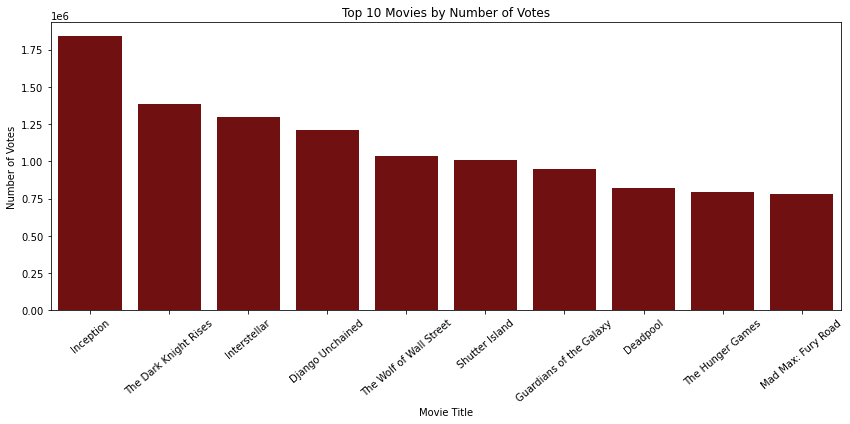

In [99]:
ratings_sorted = ratings.sort_values(by='numvotes', ascending=False)

# Select the top 10 movies
top_n = 10 
top_movies = ratings_sorted.head(top_n)

# Create a bar plot using the top 10 movies


plt.figure(figsize=(12, 6))
ax = sns.barplot(x="title", y="numvotes", data=top_movies, color ="maroon")
plt.title(f"Top 10 Movies by Number of Votes")
plt.xticks(rotation=40)
plt.xlabel("Movie Title")
plt.ylabel("Number of Votes")
plt.tight_layout()

# Show the bar plot
plt.show()

The above histogram shows the top 10 movies by number of votes

## CONCLUSIONS

Box Office Dominators:

Looking at the top money-makers like "Avatar" and superhero flicks like "Avengers: Age of Ultron," it seems large franchises, especially in fantasy and superhero genres, are box office gold. While "Inception" wasn't the top earner, it drew the most viewers, suggesting a high level of interest.

What Audiences Want:

Action, dazzling visuals, and captivating stories are a winning combination, as evidenced by popular movies like "John Wick" and "Spider-Man: Into the Spider-Verse."

Market Focus:

The dominance of the United States in terms of movie popularity suggests a potential advantage in catering to American audiences.

Engaging Audiences:

"Inception's" popularity based on audience votes highlights the power of thought-provoking and well-crafted narratives to truly grab viewers' attention.

## RECOMMENDATIONS

To maximize success, Microsoft's film studio should:

Focus on success: Develop franchises in fantasy, adventure, and superhero genres, building expansive cinematic universes like Marvel or Avatar. 

Aim for big-budget, visually stunning action films with immersive storytelling, similar to "Avengers: Infinity War" or "John Wick."

Prioritize U.S. Audience: While keeping a global perspective, cater content to American tastes to tap into the large and lucrative U.S. market.

Originality with Depth: Balance creating original, thought-provoking stories like "Inception" that engage audiences intellectually with delivering entertaining experiences.

Partner with Proven Talent: Collaborate with established directors, writers, and actors with a track record of success. This will enhance the quality and marketability of the studio's productions.